# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2024.01.23.2.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
MY_UNIQNAME = 'axbhatta'  # replace this with your uniqname

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [336]:

# 1. Load the data
invoices_url = "https://github.com/umsi-data-science/data/raw/main/invoices.json"
items_url = "https://github.com/umsi-data-science/data/raw/main/items.json"
purchases_url = "https://github.com/umsi-data-science/data/raw/main/purchases.json"

invoices = pd.read_json(invoices_url)
items = pd.read_json(items_url)
purchases = pd.read_json(purchases_url)

# Filter out the cancelled invoices for both invoices and purchases datasets
invoices = invoices[~invoices['InvoiceNo'].str.startswith('C')]
purchases = purchases[~purchases['InvoiceNo'].str.startswith('C')]

# Convert the data to data frames
df_invoices = pd.DataFrame(invoices)
df_items = pd.DataFrame(items)
df_purchases = pd.DataFrame(purchases)

# 2. How many total invoices have been placed?
total_invoices = df_invoices['InvoiceNo'].nunique()
print(f"1. Total number of invoices: {total_invoices}")

# 3. How many unique customers are there?
unique_customers = df_invoices['CustomerID'].nunique()
print(f"2. Total number of unique customers: {unique_customers}")

# 4. What is the total number of unique items?
unique_items = df_items['StockCode'].nunique()
print(f"3. Total number of unique items: {unique_items}")

# 5. Are there any columns with null values?
null_columns_invoices = df_invoices.columns[df_invoices.isnull().any()]
null_columns_items = df_items.columns[df_items.isnull().any()]
null_columns_purchases = df_purchases.columns[df_purchases.isnull().any()]
null_columns = null_columns_invoices.append(
    null_columns_items).append(null_columns_purchases)
print(f"4. Columns with null values across all three datasets: {null_columns}")

# 6. How do you think you would join the different tables?
print("5. I would join the different tables in the three datasets using the common columns in the tables.\nFor example, I would join the 'invoices' and 'purchases' tables using the InvoiceNo column and the 'items' and 'purchases' tables using the 'StockCode' and 'StockCodeSC' columns, respectively.\nIn that regard, I would also remove the non-numeric characters from the StockCodeSC column in the 'purchases' table to match the 'StockCode' column in the 'items' table.")

1. Total number of invoices: 22064
2. Total number of unique customers: 4339
3. Total number of unique items: 4070
4. Columns with null values across all three datasets: Index(['CustomerID', 'Description'], dtype='object')
5. I would join the different tables in the three datasets using the common columns in the tables.
For example, I would join the 'invoices' and 'purchases' tables using the InvoiceNo column and the 'items' and 'purchases' tables using the 'StockCode' and 'StockCodeSC' columns, respectively.
In that regard, I would also remove the non-numeric characters from the StockCodeSC column in the 'purchases' table to match the 'StockCode' column in the 'items' table.


1. Total number of invoices: 22064
2. Total number of unique customers: 4339
3. Total number of unique items: 4070
4. Columns with null values: Index(['CustomerID', 'Description'])
5. I would join the different tables using the common columns in the tables.
For example, I would join the 'invoices' and 'purchases' tables using the InvoiceNo column and the 'items' and 'purchases' tables using the common 'StockCode' and 'StockCodeSC' columns, respectively.
In that regard, I would also remove the non-numeric characters from the StockCodeSC column in the 'purchases' table to match the 'StockCode' column in the 'items' table.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [337]:
# 1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
top_10_customers_invoices = df_invoices.groupby(
    'CustomerID').size().sort_values(ascending=False).head(
    10)  # Group the invoices by customer ID and calculate the number of invoices per customer, then select the top 10 customers
print("\nTop 10 customers by total invoices:\n", top_10_customers_invoices)

# 2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
quantity_per_customer = df_purchases.groupby(
    'InvoiceNo')['Quantity'].sum().reset_index(name='TotalQuantity')  # Calculate the total quantity of items ordered per invoice
top_10_customers_quantity = quantity_per_customer.merge(invoices[['InvoiceNo', 'CustomerID']], on='InvoiceNo').groupby(
    'CustomerID')['TotalQuantity'].sum().reset_index(name='TotalQuantity')  # Merge the total quantity per invoice with the customer ID and calculate the total quantity per customer
top_10_customers_quantity = top_10_customers_quantity.sort_values(
    by='TotalQuantity', ascending=False).head(10).reset_index(drop=True)  # Sort the customers by the total quantity ordered and select the top 10
print("\nTop 10 customers by total quantity ordered:\n", top_10_customers_quantity)

# 3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.
print("\n\nWhile there may exist some correlation between the number of invoices and the total quantity ordered, it does not seem to be a straightforward linear relationship.\nFor example, Customer 14646, with the highest total quantity ordered, does not have the highest number of invoices. Similarly, although Customer 12748 has the highest number of invoices, they are not the top customer in terms of total quantity.\nTherefore, there isn't a clear linear relationship between the number of invoices and the total quantity ordered.")


Top 10 customers by total invoices:
 CustomerID
12748.0    211
14911.0    202
17841.0    124
13089.0     97
14606.0     95
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
dtype: int64

Top 10 customers by total quantity ordered:
    CustomerID  TotalQuantity
0     14646.0         197491
1     14911.0          81009
2     16446.0          80997
3     12415.0          77670
4     12346.0          74215
5     17450.0          69993
6     17511.0          67423
7     18102.0          64124
8     13694.0          63312
9     14298.0          58343


While there may exist some correlation between the number of invoices and the total quantity ordered, it does not seem to be a straightforward linear relationship.
For example, Customer 14646, with the highest total quantity ordered, does not have the highest number of invoices. Similarly, although Customer 12748 has the highest number of invoices, they are not the top customer in terms of total quantity.
Therefore, t

1. Table listed above:
Top 10 customers by total invoices:

|      | CustomerID | Total Invoices|
|------|------------|---------------|
| 0 | 12748.0    | 211           |
| 1  | 14911.0    | 202           |
| 2 | 17841.0    | 124           |
| 3 | 13089.0    | 97           |
| 4  | 14606.0     | 95           |
| 5 | 15311.0    | 91           |
| 6  | 12971.0    | 86            |
| 7 | 14646.0    | 74            |
| 8  | 16029.0    | 63           |
| 9 | 13408.0    | 62           |

2. Table listed above:
Top 10 customers by total quantity ordered:

|     | CustomerID | Total Quantity |
|-----|-------|----------------|
| 0 | 14646.0    | 197491         |
| 1 | 14911.0    | 81009          |
| 2 | 16446.0    | 80997          |
| 3 | 12415.0    | 77670          |
| 4 | 12346.0    | 74215          |
| 5 | 17450.0    | 69993          |
| 6 | 17511.0    | 67423          |
| 7 | 18102.0    | 64124          |
| 8 | 13694.0    | 63312          |
| 9 | 14298.0    | 58343          |

3. While there may exist some correlation between the number of invoices and the total quantity ordered, it does not seem to be a straightforward linear relationship.
For example, Customer 14646, with the highest total quantity ordered, does not have the highest number of invoices. Similarly, although Customer 12748 has the highest number of invoices, they are not the top customer in terms of total quantity.
Therefore, there isn't a clear linear relationship between the number of invoices and the total quantity ordered.

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 


Average item-unit price: 6.91
Percentage of items under $25: 98.75%


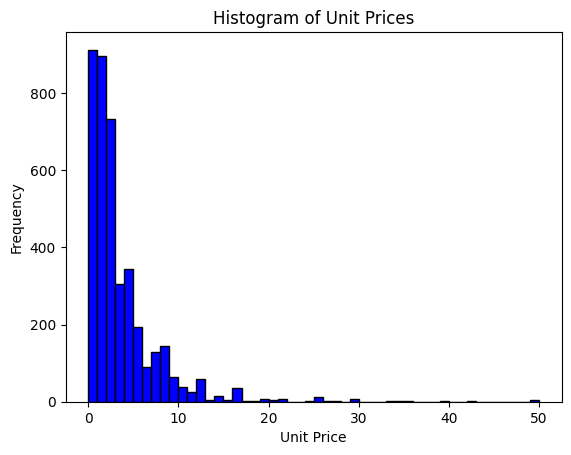

I picked the range (0, 50) for the x-axis because it captures the majority of the unit prices. 
The histogram shows that the majority of the unit prices are between 0 and 20, with a few unit prices between 20 and 50. 
The histogram is right-skewed, with the majority of the unit prices being on the lower end.


In [338]:
# What is the average item-unit price?
# calculate the average item-unit price
average_item_unit_price = df_items['UnitPrice'].mean()
print(f"\nAverage item-unit price: {average_item_unit_price:.2f}")

# What % of items are under $25?
# calculate the percentage of items under $25
items_under_25 = (df_items['UnitPrice'] < 25).mean() * 100
print(f"Percentage of items under $25: {items_under_25:.2f}%")

# Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram?
plt.hist(df_items['UnitPrice'], bins=50, range=(
    0, 50), color='blue', edgecolor='black')
plt.title('Histogram of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()
print("I picked the range (0, 50) for the x-axis because it captures the majority of the unit prices. \nThe histogram shows that the majority of the unit prices are between 0 and 20, with a few unit prices between 20 and 50. \nThe histogram is right-skewed, with the majority of the unit prices being on the lower end.")

I picked the range (0, 50) for the x-axis because it captures the majority of the unit prices. 
The histogram shows that the majority of the unit prices are between 0 and 20, with a few unit prices between 20 and 50. 
The histogram is right-skewed, with the majority of the unit prices being on the lower end.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.)
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [339]:
# Merge all three datasets together
items_purchases = df_items.merge(df_purchases.assign(StockCodeSC=df_purchases['StockCodeSC'].str.extract('(\d+)')),
                                 left_on='StockCode', right_on='StockCodeSC', how='outer')  # Code generated by ChatGPT
items_purchases_invoices = items_purchases.merge(
    df_invoices, on='InvoiceNo')  # merge items_purchases and invoices
# Drop rows with null values
# items_purchases_invoices = items_purchases_invoices.dropna()

# 1. What are the top 10 most ordered items? Describe them. Do you see any trends?
# Calculate total quantity for each stock code
total_ordered_per_item = items_purchases_invoices.groupby(
    ['InvoiceNo', 'StockCode'])['Quantity'].sum()
# Get the top 10 most ordered items
top_10_ordered_items = total_ordered_per_item.sort_values(
    ascending=False).head(10).reset_index()
# Merge with items to get the description
top_10_ordered_items_with_desc = top_10_ordered_items.merge(
    df_items[['StockCode', 'Description']], on='StockCode')
# Display the result
print("\nTop 10 most ordered items with description:\n",
      top_10_ordered_items_with_desc[['InvoiceNo', 'StockCode', 'Quantity', 'Description']])


# 2. What are the top 5 invoices that generated the most revenue?
# Calculate the total revenue for each invoice with a 25% markup
items_purchases_invoices['TotalRevenue'] = (
    items_purchases_invoices['Quantity'] * items_purchases_invoices['UnitPrice']) * 1.25
total_revenue_per_invoice = items_purchases_invoices.groupby('InvoiceNo')[
    'TotalRevenue'].sum()
# Get the top 5 invoices generating the most revenue
top_5_revenue_invoices = total_revenue_per_invoice.sort_values(
    ascending=False).head(5).reset_index()
# Round the TotalRevenue column to 2 decimal points
top_5_revenue_invoices['TotalRevenue'] = top_5_revenue_invoices['TotalRevenue'].round(
    1)
# Display the result
print("\nTop 5 invoices generating the most revenue with a 25% markup:\n",
      top_5_revenue_invoices)


# 3. Do the top 5 invoices contain any of the top 10 most ordered items?
# Get the set of StockCodes for the top 10 most ordered items
top_10_stockcodes = set(top_10_ordered_items_with_desc['StockCode'])
# Check if any of the top 5 revenue invoices contain the top 10 ordered items
top_5_revenue_with_ordered_items = top_5_revenue_invoices[top_5_revenue_invoices['InvoiceNo'].isin(
    top_10_ordered_items['InvoiceNo'])]  # Code generated by ChatGPT
# Display the result
print("\nTop 5 invoices that contain any of the top 10 ordered items:\n",
      top_5_revenue_with_ordered_items)


Top 10 most ordered items with description:
   InvoiceNo StockCode  Quantity                          Description
0    581483     23843   80995.0          PAPER CRAFT , LITTLE BIRDIE
1    541431     23166   74215.0       MEDIUM CERAMIC TOP STORAGE JAR
2    578841     84826   12540.0       ASSTD DESIGN 3D PAPER STICKERS
3    542504     37413    5568.0                                 None
4    573008     84077    4800.0    WORLD WAR 2 GLIDERS ASSTD DESIGNS
5    554868     22197    4300.0                 SMALL POPCORN HOLDER
6    544612     22053    3906.0                EMPIRE DESIGN ROSETTE
7    560599     18007    3186.0  ESSENTIAL BALM 3.5g TIN IN ENVELOPE
8    540815     21108    3114.0   FAIRY CAKE FLANNEL ASSORTED COLOUR
9    550461     21108    3114.0   FAIRY CAKE FLANNEL ASSORTED COLOUR

Top 5 invoices generating the most revenue with a 25% markup:
   InvoiceNo  TotalRevenue
0    581483      210587.0
1    541431       96479.5
2    556255       34323.8
3    556917       33145.4
4

Top 10 most ordered items with description:
| InvoiceNo | StockCode | Quantity | Description                             |
|-----------|-----------|----------|-----------------------------------------|
| 581483    | 23843     | 80995    | PAPER CRAFT, LITTLE BIRDIE              |
| 541431    | 23166     | 74215    | MEDIUM CERAMIC TOP STORAGE JAR         |
| 578841    | 84826     | 12540    | ASSTD DESIGN 3D PAPER STICKERS         |
| 542504    | 37413     | 5568.0    | None         |
| 573008    | 84077     | 4800     | WORLD WAR 2 GLIDERS ASSTD DESIGNS      |
| 554868    | 22197     | 4300     | SMALL POPCORN HOLDER                   |
| 544612    | 22053     | 3906     | EMPIRE DESIGN ROSETTE                  |
| 560599    | 18007     | 3186     | ESSENTIAL BALM 3.5g TIN IN ENVELOPE    |
| 540815    | 21108     | 3114     | FAIRY CAKE FLANNEL ASSORTED COLOUR     |
| 550461    | 21108     | 3114     | FAIRY CAKE FLANNEL ASSORTED COLOUR     |

Looking at the top 10 most ordered items, I can see that all the items listed seem to belong to either stationery or storage products. There is an item named **FAIRY CAKE FLANNEL ASSORTED COLOUR** that has been repeated in the dataset, and they both seem to share the same StockCode number and are ordered the same exact number of times albeit with different invoice numbers. I can also see that the most ordered item, **PAPER CRAFT, LITTLE BIRDIE**, has been ordered at a lot higher rate than other items, especially compared with the items ranking from 4th most ordered.


Top 5 invoices generating the most revenue:
| InvoiceNo | TotalRevenue |
|-----------|--------------|
| 581483    | 210587.0  |
| 541431    | 96479.5  |
| 556255    | 34323.8   |
| 556917    | 33145.4    |
| 563614    | 32167.2    |


Top 5 invoices that contain any of the top 10 ordered items:
| InvoiceNo | TotalRevenue |
|-----------|--------------|
| 581483    | 210587.0     |
| 541431    | 96479.5     |

The top 5 invoices consist of two items that can also be seen in the top 10 most ordered items:
1. **PAPER CRAFT, LITTLE BIRDIE**
2. **MEDIUM CERAMIC TOP STORAGE JAR**


### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
2. How many customers are in each segment? 
3. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
4. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
5. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [359]:
# 1. Classify customers into segments based on the total revenue they have generated for the company.
#  * low value: less than \$1750
#  * medium value: between 1750 and 8250 dollars
#  * high value: greater than \$8250

revenue_segments = items_purchases_invoices.groupby('CustomerID')[
    'TotalRevenue'].sum()

# Classify customers into segments based on the total revenue they have generated for the company
low_value_customers = revenue_segments[revenue_segments < 1750]
medium_value_customers = revenue_segments[(revenue_segments >= 1750) & (
    revenue_segments <= 8250)]
high_value_customers = revenue_segments[revenue_segments > 8250]
items_purchases_invoices['RevenueSegment'] = pd.cut(
    revenue_segments, bins=[0, 1750, 8250, revenue_segments.max()], labels=['Low', 'Medium', 'High'])

# 2. How many customers are in each segment?
print("\nNumber of customers in each segment:\n",
      "Low value:", low_value_customers.count(), "\n",
      "Medium value:", medium_value_customers.count(), "\n",
      "High value:", high_value_customers.count())

# 3. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
pivot_table = pd.pivot_table(items_purchases_invoices, index='StockCode',
                             columns='RevenueSegment', values='Quantity', aggfunc='mean').dropna()
print("\nPivot table displaying the average order quantity of each stock code for a given segment:\n", pivot_table)

# 4. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning.
# Code generated by ChatGPT
# Identify StockCodes with the highest average order quantity in each segment
highest_avg_qty_low = pivot_table['Low'].idxmax()
highest_avg_qty_medium = pivot_table['Medium'].idxmax()
highest_avg_qty_high = pivot_table['High'].idxmax()
# Compare StockCodes across segments
are_highest_avg_qty_same_across_segments = (
    highest_avg_qty_low == highest_avg_qty_medium == highest_avg_qty_high
)
print(are_highest_avg_qty_same_across_segments)
print("\n\nNo, the items with the highest average order quantity do not generally seem to be same across segments.\nFor example, StockCodes 21033 and 47566 have very different values across all three segments. \nThis suggests that the items with the highest average order quantity are not consistent across segments.")

# 5. Choose three items and discuss any trends/differences you notice across the three segments.
# Select three items
selected_items = pivot_table.sample(3).index
# Display the average order quantity of the selected items across segments
print("\nAverage order quantity of the selected items across segments:\n",
      pivot_table.loc[selected_items])
print("There is a consistent pattern where the average order quantity tends to decrease as we move from the Low to the Medium and High segments.\nThis could imply that certain items may have broader appeal among customers with lower spending levels, while their popularity diminishes among customers with higher spending capacity.")


Number of customers in each segment:
 Low value: 2986 
 Medium value: 1149 
 High value: 204

Pivot table displaying the average order quantity of each stock code for a given segment:
 RevenueSegment        Low     Medium   High
StockCode                                  
10133            5.833333   2.000000   2.00
20712           20.800000  16.000000   1.50
20726            4.000000   1.500000   1.00
21033           12.750000   9.000000  37.00
21035            5.600000   2.500000   1.00
...                   ...        ...    ...
23344            1.000000  10.000000   1.00
47566            5.307692  16.375000   3.00
71053            6.681818   5.263158   8.25
84637            2.000000   1.000000   1.00
84991            2.250000  24.000000   1.00

[70 rows x 3 columns]
False


No, the items with the highest average order quantity do not generally seem to be same across segments.
For example, StockCodes 21033 and 47566 have very different values across all three segments. 
This suggest

Number of customers in each segment:
 Low value: 2986 
 Medium value: 1149 
 High value: 204

| StockCode | Low Segment | Medium Segment | High Segment |
|-----------|-------------|-----------------|--------------|
| 84637     | 2.0         | 1.0             | 1.0          |
| 21035     | 5.6         | 2.5             | 1.0          |
| 22167     | 3.0         | 1.0             | 1.0          |

I notice a consistent pattern where in average, the order quantity tends to decrease as we move from the Low to the Medium and High segments.
In my opinion, this could imply that certain items may have broader appeal among customers with lower spending levels, while their popularity diminishes among customers with higher spending capacity.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas